# Data Preprocessing


Create Power Point slides to present your project to the class. Your presentation should show a sample of your data, data preparation, and data visualization.

The time limit for each group is 5 min.

## Reformating the CSV data

some of the scrapped data contained ',' in the text, which caused the data to be split into multiple columns


In [2]:
max_commas = 10 # maximum number of commas in a row

DATA_PATH = 'data/final_data.csv'

"""
reads the data from the CSV file and creates 2 new files, one with good data and one with bad data
"""
with open(DATA_PATH, 'r') as f:
    with open('data/good_data.csv', 'w') as g:
        with open('data/bad_data.csv', 'w') as b:
            for line in f:
                if line.count(',') > max_commas:
                    b.write(line)
                else:
                    g.write(line)

# printing the number of lines in each file
print('good data: ', sum(1 for line in open('data/good_data.csv')))
print('bad data: ', sum(1 for line in open('data/bad_data.csv')))


good data:  48437
bad data:  13


## Data Visualization


In [3]:
# loading part of the data

import pandas as pd

df = pd.read_csv('data/good_data.csv')
df.head()


,first_name,last_name,birth_date,birth_place_state,birth_place_country,father_first_name,father_last_name,mother_first_name,mother_last_name,gender,ethnicity
0,Cole,Hauser,1975-3-22,California,USA,Cass,Warner,Wings,Hauser,m,None
1,Christian,Bale,1974-1-30,Wales,UK,Jennifer,(James),NaN,NaN,m,None
2,NaN,NaN,1987-2-9,California,USA,Donna,(Davis),Michael,Jordan,m,None
3,Nick,Offerman,1970-6-26,Illinois,USA,Cathy,Roberts,Ric,Offerman,m,None
4,Alexander,Skarsgård,1976-8-25,Stockholms län,Sweden,Stellan,Skarsgård,My,Skarsgård,m,None


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48436 entries, 0 to 48435
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   first_name           46290 non-null  object
 1   last_name            46052 non-null  object
 2   birth_date           48436 non-null  object
 3   birth_place_state    48436 non-null  object
 4   birth_place_country  48436 non-null  object
 5   father_first_name    10615 non-null  object
 6   father_last_name     10614 non-null  object
 7   mother_first_name    7579 non-null   object
 8   mother_last_name     7578 non-null   object
 9   gender               48436 non-null  object
 10  ethnicity            48436 non-null  object
dtypes: object(11)
memory usage: 4.1+ MB


In [5]:
df.describe()


,first_name,last_name,birth_date,birth_place_state,birth_place_country,father_first_name,father_last_name,mother_first_name,mother_last_name,gender,ethnicity
count,46290,46052,48436,48436,48436,10615,10614,7579,7578,48436,48436
unique,10510,22714,21087,2044,345,3186,6901,2444,5157,2,1
top,John,Lee,None,None,USA,John,Sr.,John,Smith,f,None
freq,445,165,12544,14863,19205,272,101,152,44,26299,48436


### Display a world map

with red circles on countries in the list with the circle brightness corresponding to the frequency of that country.


#### Testing modules for map plotting


In [6]:
# Testing modules

# import pycountry

# # pycountry.countries.get(name="USA").alpha_3
# pycountry.countries.search_fuzzy("USA")[0]

# pycountry.countries.get(alpha_3="USA")




# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="NameGAN")
# location = geolocator.geocode("Mexico")
# print((location.latitude, location.longitude))


In [7]:
# testing modules integration

# import plotly.graph_objs as go # pip install plotly 
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="NameGAN")

# country_data = {'USA': 50, 'Canada': 20, 'Mexico': 30, 'Brazil': 40, 'Argentina': 10, 'India': 50}

# lon, lat, size = [], [], []
# for c in country_data:
#     location = geolocator.geocode(c)
    
#     lon.append(location.longitude)
#     lat.append(location.latitude)
#     size.append(100/5*country_data[c]/country_data[max(country_data)])


# data = go.Scattergeo(
#     mode='markers',
#     marker=dict(
#         symbol='circle',
#         color='red',
#         size=size,
#         sizemode='diameter'
#     ),
#     lon=lon,
#     lat=lat,
# )

# layout = go.Layout(
#     geo=dict(
#         projection_type='natural earth',
#     )
# )

# fig = go.Figure(data=data, layout=layout)

# fig.show()

""" Ref.s
https://plotly.com/python/scatter-plots-on-maps/
https://geopy.readthedocs.io/en/stable/
"""


' Ref.s\nhttps://plotly.com/python/scatter-plots-on-maps/\nhttps://geopy.readthedocs.io/en/stable/\n'

In [8]:
# getting dictionary of countries and their frequencies from the data frame

countries = df['birth_place_country'].value_counts().to_dict()
del countries['None']
# only using 1st 100 countries, the rest will be grouped into 'Other', since plotting all countries will be too crowded and takes too much time
countries = dict(list(countries.items())[:100])
countries['Other'] = sum(countries.values()) - sum(list(countries.values())[:100])
countries, len(countries)


({' USA': 19205,
  ' UK': 4800,
  ' Canada': 1720,
  ' India': 787,
  ' France': 621,
  ' Australia': 603,
  ' Germany': 425,
  ' Italy': 398,
  ' Spain': 362,
  ' Japan': 298,
  ' Turkey': 281,
  ' Mexico': 237,
  ' Ireland': 234,
  ' Sweden': 231,
  ' Denmark': 151,
  ' South Korea': 139,
  ' China': 136,
  ' New Zealand': 123,
  ' Poland': 119,
  ' Netherlands': 102,
  ' South Africa': 99,
  ' Israel': 91,
  ' Argentina': 86,
  ' West Germany': 81,
  ' Brazil': 77,
  ' Austria': 74,
  ' USSR [now Russia]': 74,
  ' Philippines': 72,
  ' Belgium': 71,
  ' Norway': 68,
  ' Yugoslavia': 65,
  ' Korea': 60,
  ' Puerto Rico': 57,
  ' Colombia': 55,
  ' Hungary': 51,
  ' British India': 49,
  ' Romania': 48,
  ' Cuba': 45,
  ' Switzerland': 43,
  ' Russia]': 42,
  ' Iran': 39,
  ' Finland': 39,
  ' Portugal': 37,
  ' Czechoslovakia [now Czech Republic]': 34,
  ' Egypt': 33,
  ' Greece': 33,
  ' Venezuela': 32,
  ' Russia': 29,
  ' Taiwan': 27,
  ' Chile': 25,
  ' Ukraine]': 24,
  ' German 

In [9]:
# plotting the countries data on world map


# import plotly.graph_objs as go # pip install plotly 
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="NameGAN")

# country_data = countries

# lon, lat, size = [], [], []
# for c in country_data:
#     try:
#         location = geolocator.geocode(c)
        
#         lon.append(location.longitude)
#         lat.append(location.latitude)
#         # size.append(100/5*country_data[c]/country_data[max(country_data)])
#     except:
#         pass


# data = go.Scattergeo(
#     mode='markers',
#     marker=dict(
#         symbol='circle',
#         color='red',
#         # size=size,
#         size=10,
#         sizemode='diameter'
#     ),
#     lon=lon,
#     lat=lat,
# )

# layout = go.Layout(
#     geo=dict(
#         projection_type='natural earth',
#     )
# )

# fig = go.Figure(data=data, layout=layout)

# fig.show()


In [10]:
import folium

# # Create a map object centered on the world
# world_map = folium.Map(location=[0, 0], zoom_start=2)

# # Define a color function to map frequencies to colors
# def get_color(frequency):
#     # Define the red and green values for the color gradient
#     red = min(int(frequency * 255), 255)
#     green = min(int((1 - frequency) * 255), 255)
#     # Return the RGB color as a string
#     return '#{:02x}{:02x}{:02x}'.format(red, green, 0)

# # Create a dictionary of country frequencies
# # country_freq = {'United States': 0.3, 'China': 0.5, 'India': 0.2}
# country_freq = countries

# # Loop through the countries and add markers to the map
# for country, frequency in country_freq.items():
#     # Get the latitude and longitude of the country
#     try:
#         location = (geolocator.geocode(country).latitude, geolocator.geocode(country).longitude)
#     except:
#         continue
#     # Create a marker with the frequency mapped to a color
#     folium.CircleMarker(location=location, radius=10, color=get_color(frequency), fill=True, fill_color=get_color(frequency)).add_to(world_map)

# # Display the map
# world_map


### Normalizing the data

Filling none values


In [11]:
# first_ name: if none, use father's name or mother's name
print(f'We had {df["first_name"].isna().sum()} missing first names.')
df['first_name'] = df['first_name'].fillna(df['father_first_name'])
print(f'Number of missing first names after filling with father name: {df["first_name"].isna().sum()}')

df['first_name'] = df['first_name'].fillna(df['mother_first_name'])
print(f'Number of missing first names after filling with mother name: {df["first_name"].isna().sum()}')

# removing rows with missing first names
df = df.dropna(subset=['first_name'])
print(f'Number of missing first names after removing rows with missing first names: {df["first_name"].isna().sum()}')
print(f'Number of rows after removing rows with missing first names: {len(df)}')


We had 2146 missing first names.
Number of missing first names after filling with father name: 1668
Number of missing first names after filling with mother name: 1668
Number of missing first names after removing rows with missing first names: 0
Number of rows after removing rows with missing first names: 46768


In [12]:
# last_name: if none, use father's surename or mother's surename

print(f'We had {df["last_name"].isna().sum()} missing last names.')
df['last_name'] = df['last_name'].fillna(df['father_last_name'])
print(f'Number of missing last names after filling with father surname: {df["last_name"].isna().sum()}')

df['last_name'] = df['last_name'].fillna(df['mother_last_name'])
print(f'Number of missing last names after filling with mother surname: {df["last_name"].isna().sum()}')

# removing rows with missing last names
df = df.dropna(subset=['last_name'])
print(f'Number of missing last names after removing rows with missing last names: {df["last_name"].isna().sum()}')
print(f'Number of rows after removing rows with missing last names: {len(df)}')


We had 716 missing last names.
Number of missing last names after filling with father surname: 182
Number of missing last names after filling with mother surname: 182
Number of missing last names after removing rows with missing last names: 0
Number of rows after removing rows with missing last names: 46586


In [13]:
# birth_date: if none, use median of birth dates

print(f'We had {df["birth_date"].isna().sum()} missing birth dates.')
df['birth_date'] = df['birth_date'].fillna('2022-01-01') # filling with a random date
# df['birth_date'] = df['birth_date'].fillna(df['birth_date'].median())
print(f'Number of missing birth dates after filling with median: {df["birth_date"].isna().sum()}')


We had 0 missing birth dates.
Number of missing birth dates after filling with median: 0


In [14]:
# birth_place_state: if none, use most frequent state

print(f'We had {df["birth_place_state"].isna().sum()} missing birth place states.')
df['birth_place_state'] = df['birth_place_state'].fillna(df['birth_place_state'].mode()[0])
print(f'Number of missing birth place states after filling with most frequent state: {df["birth_place_state"].isna().sum()}')


We had 0 missing birth place states.
Number of missing birth place states after filling with most frequent state: 0


In [15]:
# birth_place_country: if none, use most frequent country

print(f'We had {df["birth_place_country"].isna().sum()} missing birth place countries.')
df['birth_place_country'] = df['birth_place_country'].fillna(df['birth_place_country'].mode()[0])
print(f'Number of missing birth place countries after filling with most frequent country: {df["birth_place_country"].isna().sum()}')


We had 0 missing birth place countries.
Number of missing birth place countries after filling with most frequent country: 0


In [16]:
# father_first_name: if none, use first_name

print(f'We had {df["father_first_name"].isna().sum()} missing father first names.')
df['father_first_name'] = df['father_first_name'].fillna(df['first_name'])
print(f'Number of missing father first names after filling with first name: {df["father_first_name"].isna().sum()}')


We had 35971 missing father first names.
Number of missing father first names after filling with first name: 0


In [17]:
# father_last_name: if none, use last_name

print(f'We had {df["father_last_name"].isna().sum()} missing father last names.')
df['father_last_name'] = df['father_last_name'].fillna(df['last_name'])
print(f'Number of missing father last names after filling with last name: {df["father_last_name"].isna().sum()}')


We had 35972 missing father last names.
Number of missing father last names after filling with last name: 0


In [18]:
# mother_first_name: if none, use first_name

print(f'We had {df["mother_first_name"].isna().sum()} missing mother first names.')
df['mother_first_name'] = df['mother_first_name'].fillna(df['first_name'])
print(f'Number of missing mother first names after filling with first name: {df["mother_first_name"].isna().sum()}')


We had 39007 missing mother first names.
Number of missing mother first names after filling with first name: 0


In [19]:
# mother_last_name: if none, use last_name

print(f'We had {df["mother_last_name"].isna().sum()} missing mother last names.')
df['mother_last_name'] = df['mother_last_name'].fillna(df['last_name'])
print(f'Number of missing mother last names after filling with last name: {df["mother_last_name"].isna().sum()}')


We had 39008 missing mother last names.
Number of missing mother last names after filling with last name: 0


### Data Statistics


In [20]:
df.head()


,first_name,last_name,birth_date,birth_place_state,birth_place_country,father_first_name,father_last_name,mother_first_name,mother_last_name,gender,ethnicity
0,Cole,Hauser,1975-3-22,California,USA,Cass,Warner,Wings,Hauser,m,None
1,Christian,Bale,1974-1-30,Wales,UK,Jennifer,(James),Christian,Bale,m,None
2,Donna,(Davis),1987-2-9,California,USA,Donna,(Davis),Michael,Jordan,m,None
3,Nick,Offerman,1970-6-26,Illinois,USA,Cathy,Roberts,Ric,Offerman,m,None
4,Alexander,Skarsgård,1976-8-25,Stockholms län,Sweden,Stellan,Skarsgård,My,Skarsgård,m,None


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46586 entries, 0 to 48435
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   first_name           46586 non-null  object
 1   last_name            46586 non-null  object
 2   birth_date           46586 non-null  object
 3   birth_place_state    46586 non-null  object
 4   birth_place_country  46586 non-null  object
 5   father_first_name    46586 non-null  object
 6   father_last_name     46586 non-null  object
 7   mother_first_name    46586 non-null  object
 8   mother_last_name     46586 non-null  object
 9   gender               46586 non-null  object
 10  ethnicity            46586 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [22]:
df.describe()


,first_name,last_name,birth_date,birth_place_state,birth_place_country,father_first_name,father_last_name,mother_first_name,mother_last_name,gender,ethnicity
count,46586,46586,46586,46586,46586,46586,46586,46586,46586,46586,46586
unique,10443,22894,20619,1999,340,10291,23317,10370,23169,2,1
top,John,Lee,None,None,USA,John,Smith,John,Smith,f,None
freq,457,170,11962,14175,18438,612,172,521,164,26109,46586


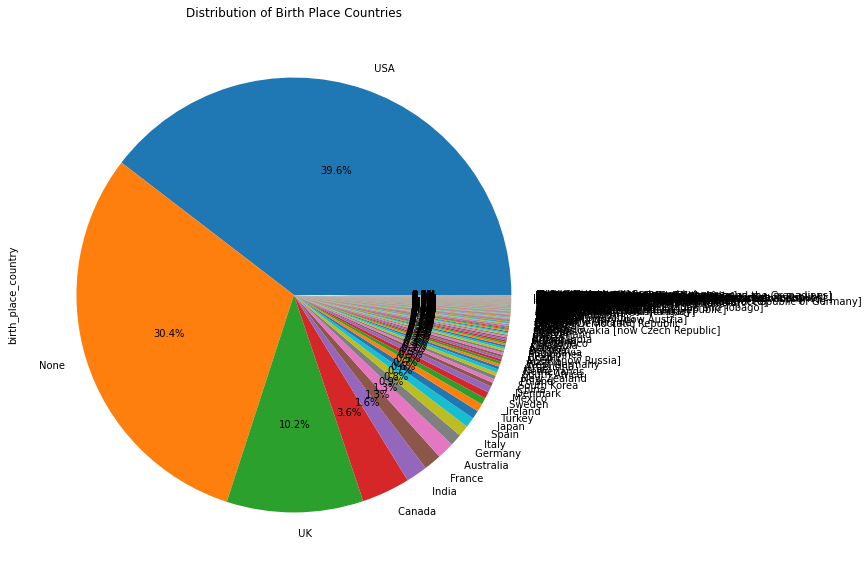

In [23]:
# pichart showing distribution of birth place countries

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
df['birth_place_country'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Birth Place Countries')
plt.show()


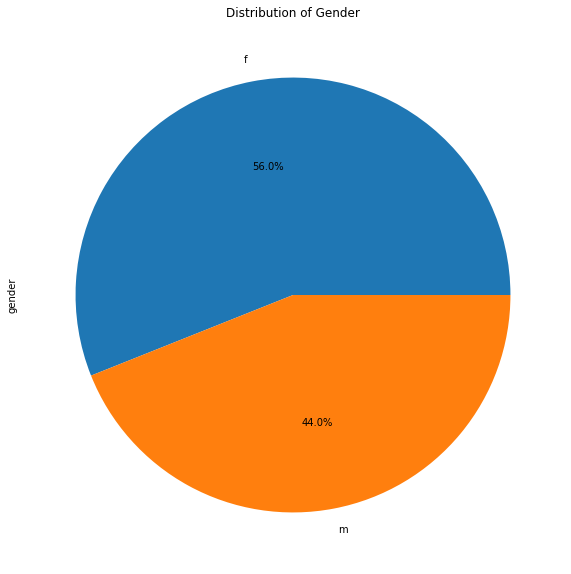

In [24]:
# pichart showing distribution of gender

plt.figure(figsize=(20,10))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()


In [25]:
# encode all features to numerical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['first_name'] = le.fit_transform(df['first_name'])
df['last_name'] = le.fit_transform(df['last_name'])
df['birth_date'] = le.fit_transform(df['birth_date'])
df['birth_place_state'] = le.fit_transform(df['birth_place_state'])
df['birth_place_country'] = le.fit_transform(df['birth_place_country'])
df['father_first_name'] = le.fit_transform(df['father_first_name'])
df['father_last_name'] = le.fit_transform(df['father_last_name'])
df['mother_first_name'] = le.fit_transform(df['mother_first_name'])
df['mother_last_name'] = le.fit_transform(df['mother_last_name'])
df['gender'] = le.fit_transform(df['gender'])



In [26]:
df.head()


,first_name,last_name,birth_date,birth_place_state,birth_place_country,father_first_name,father_last_name,mother_first_name,mother_last_name,gender,ethnicity
0,1940,8905,13540,88,286,1552,22216,10008,9022,1,None
1,1817,1314,13138,716,282,4375,99,1798,1386,1,None
2,2551,13,17007,88,286,2484,61,6494,10471,1,None
3,7018,15444,12176,280,286,1570,17875,7887,15650,1,None
4,273,19212,13951,600,261,8884,19597,6764,19457,1,None


/var/folders/mp/0s1plhcj50jcmbfk6lywf15m0000gn/T/ipykernel_2163/379668001.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


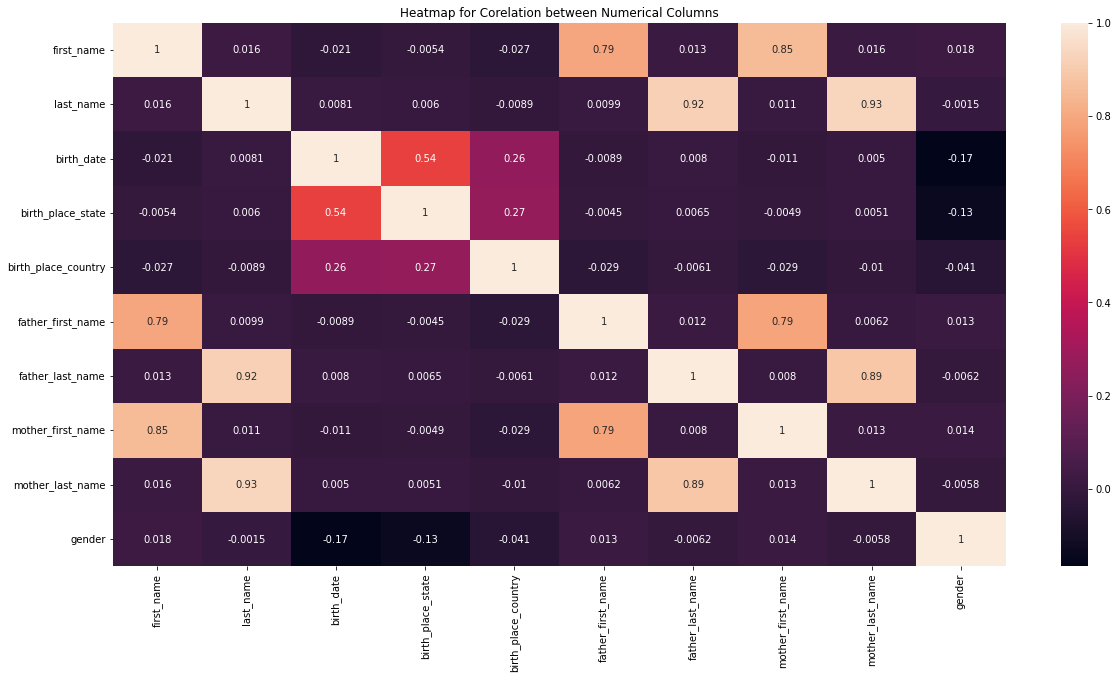

In [27]:
# heat map for corelation between numerical columns

import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap for Corelation between Numerical Columns')
plt.show()


In [28]:
# list top 5 correlated features

corr = df.corr()
corr = corr.abs().unstack()
corr = corr.sort_values(kind="quicksort", ascending=False)
corr = corr[corr != 1]
corr = corr[0:6]
print(corr)


mother_last_name  last_name           0.932420
last_name         mother_last_name    0.932420
                  father_last_name    0.917198
father_last_name  last_name           0.917198
mother_last_name  father_last_name    0.888516
father_last_name  mother_last_name    0.888516
dtype: float64


/var/folders/mp/0s1plhcj50jcmbfk6lywf15m0000gn/T/ipykernel_2163/1182740700.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


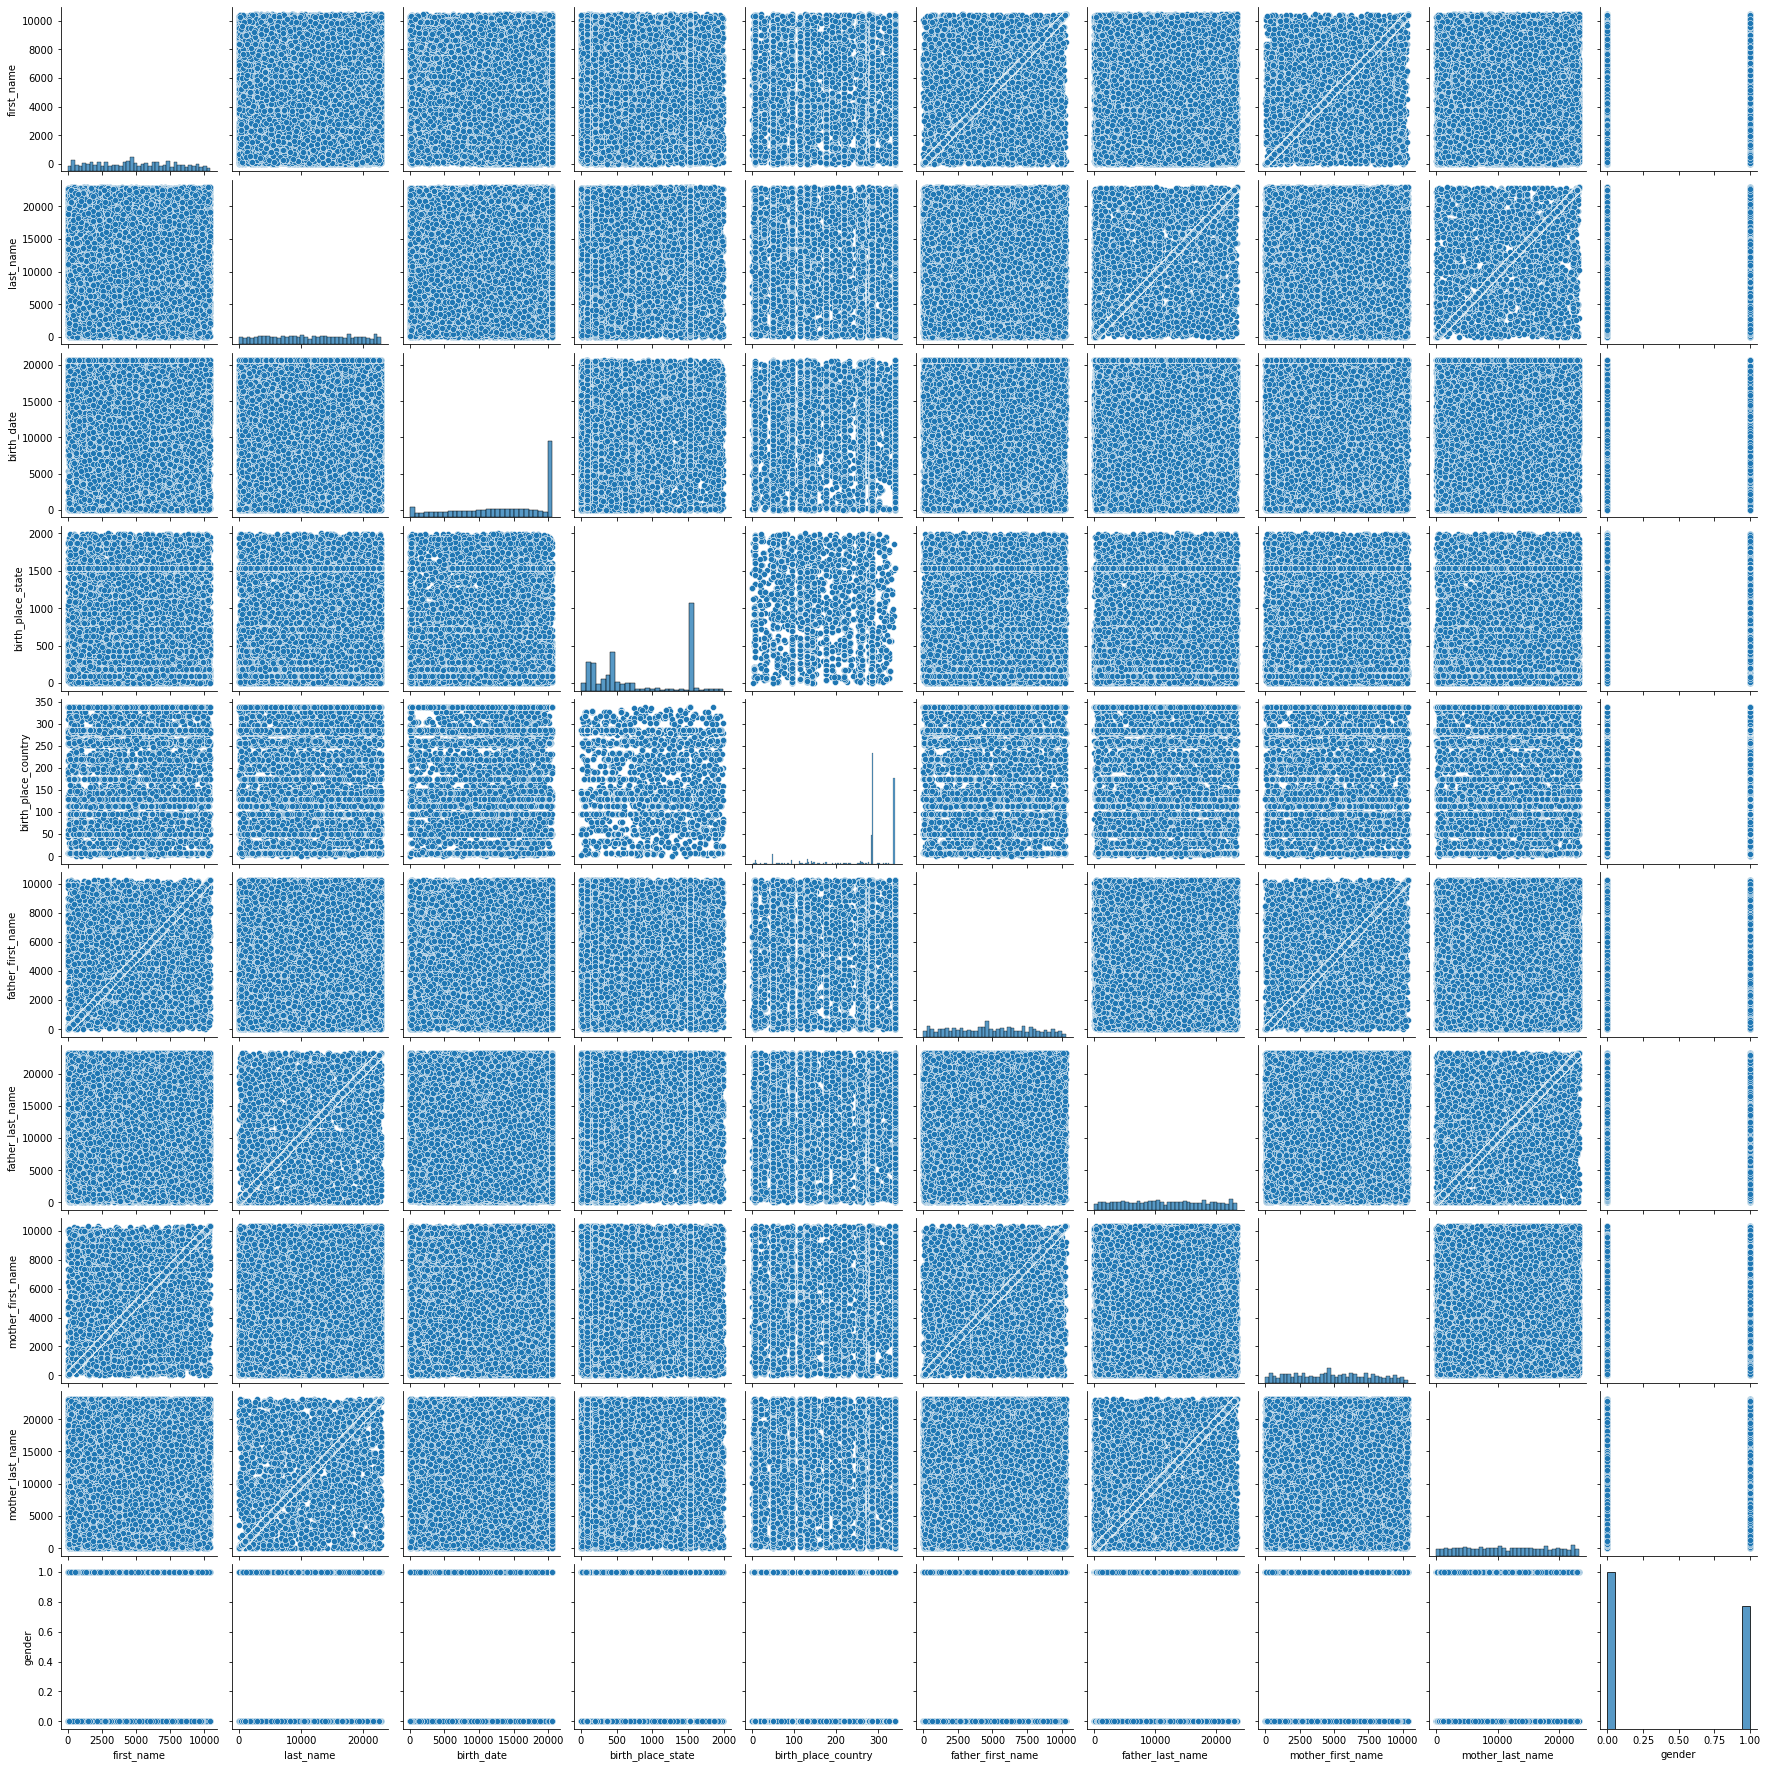

In [29]:
# pairplot for all numerical columns

sns.pairplot(df)


In [30]:
# saving the cleaned dataset

df.to_csv('data/preprocessed_data.csv', index=False)
